In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [173]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


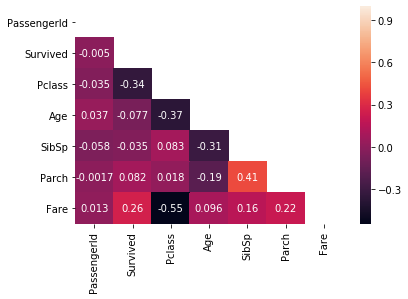

In [174]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=False, annot=True)

In [175]:
df.Age=df.Age.fillna(value=df.Age.mean)
df.Embarked=df.Embarked.fillna(value='Missing')
df.Embarked=df.Embarked.replace('C','Cherbourg').replace('Q','Queenstown').replace('S','Southampton')
df = df.drop('Cabin', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Name', axis=1)
df = df.dropna()
y = df.Survived
X = df.drop('Survived',axis=1)

In [176]:
def encode_and_concat_feature(X, feature_name):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    ohe = OneHotEncoder()
    single_feature_df = X[[feature_name]]
    feature_array = ohe.fit_transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0])
    # drop the old feature from X and concat the new one-hot encoded df
    X = pd.concat([X, ohe_df], axis=1)
#     X = X.drop(f'{feature_name}', axis=1)
    return X

In [180]:
X = encode_and_concat_feature(X,'Pclass')
for i in [1,2,3]:
    X.rename(columns={i:f'Pclass: {i}'},inplace=True)
X.drop('Pclass',axis=1,inplace=True)
X = encode_and_concat_feature(X,'Sex')
X.drop('Sex',axis=1,inplace=True)
X = encode_and_concat_feature(X,'SibSp')
for i in range(9):
    X.rename(columns={i:f'SibSp: {i}'},inplace=True)
X.drop('SibSp',axis=1,inplace=True)
X = encode_and_concat_feature(X,'Parch')
for i in range(7):
    X.rename(columns={i:f'Parch: {i}'},inplace=True)
X.drop('Parch',axis=1,inplace=True)
X = encode_and_concat_feature(X,'Embarked')
X.drop('Embarked',axis=1,inplace=True)


In [181]:
X.head()

,PassengerId,Age,Fare,Pclass: 1,Pclass: 2,Pclass: 3,female,male,SibSp: 0,SibSp: 1,...,Parch: 1,Parch: 2,Parch: 3,Parch: 4,Parch: 5,Parch: 6,Cherbourg,Missing,Queenstown,Southampton
0,1,22,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,38,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,26,7.9250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,35,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,35,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [182]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64